<a href="https://colab.research.google.com/github/mridul-chavan/deep-learning/blob/master/Pet_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pet Classification : Cat or Dog**



In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


**Installing Dependencies**

In [2]:
!pip install tensorflow==1.15

     |████████████████████████████████| 412.3MB 41kB/s 
     |████████████████████████████████| 3.8MB 52.4MB/s 
     |████████████████████████████████| 512kB 50.3MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=9bbfab37e51a41e63e26339c219b3490edfe53995fc5eb2eeb328715ee3deb89
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: 

In [3]:
%tensorflow_version 1.x
import tensorflow.compat.v1 as tf
print(tf.__version__)
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

TensorFlow 1.x selected.
1.15.2
Found GPU at: /device:GPU:0


In [4]:
!apt-get install protobuf-compiler python-pil python-lxml python-tk
!pip install Cython tf_slim
#!pip install jupyter
#!pip install matplotlib

!git clone https://github.com/tensorflow/models.git

%cd /content/gdrive/My Drive/object_detection/models/research

!protoc object_detection/protos/*.proto --python_out=.

%set_env PYTHONPATH=/content/gdrive/My Drive/object_detection/models/research:/content/gdrive/My Drive/object_detection/models/research/slim

!python object_detection/builders/model_builder_test.py

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
python-tk is already the newest version (2.7.17-1~18.04).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  python-bs4 python-chardet python-html5lib python-olefile
  python-pkg-resources python-six python-webencodings
Suggested packages:
  python-genshi python-lxml-dbg python-lxml-doc python-pil-doc python-pil-dbg
  python-setuptools
The following NEW packages will be installed:
  python-bs4 python-chardet python-html5lib python-lxml python-olefile
  python-pil python-pkg-resources python-six python-webencodings
0 upgraded, 9 newly installed, 0 to remove and 33 not upgraded.
Need to get 1,818 kB of archives.
After this operation, 7,685 kB of additional disk space will be used.
Get:1 htt

In [5]:
import os
os.getcwd()

'/content/gdrive/My Drive/object_detection/models/research'

Cat and dog images have been gathered and labelled. 160 images were labelled, out of which 80 are in train folder and 40 are in test folder. The test and train folders are in the /content/gdrive/My Drive/object_detection/models/research/object_detection/images/ path 

---

Next step is to, convert xml files to csv format.

In [17]:
os.getcwd()

'/content/gdrive/My Drive/object_detection/models/research'

In [7]:
os.chdir('/content/gdrive/My Drive/object_detection/models/research/object_detection/')

In [8]:
!python xml_to_csv.py

Successfully converted xml to csv.
Successfully converted xml to csv.


After conversion of xml to csv, we need to generate TFRecords.

In [9]:
os.getcwd()

'/content/gdrive/My Drive/object_detection/models/research/object_detection'

In [7]:
os.chdir('/content/gdrive/My Drive/object_detection/models/research/object_detection/')

In [22]:
 !python generate_TFRecord.py --csv_input='/content/gdrive/My Drive/object_detection/models/research/object_detection/images/train_labels.csv' --image_dir='/content/gdrive/My Drive/object_detection/models/research/object_detection/images/train' --output_path=train.record

Successfully created the TFRecords: /content/gdrive/My Drive/object_detection/models/research/object_detection/train.record


In [23]:
 !python generate_TFRecord.py --csv_input='/content/gdrive/My Drive/object_detection/models/research/object_detection/images/test_labels.csv' --image_dir='/content/gdrive/My Drive/object_detection/models/research/object_detection/images/test' --output_path=test.record

Successfully created the TFRecords: /content/gdrive/My Drive/object_detection/models/research/object_detection/test.record


After creating the TF Records for the train and test dataset, the labelmap.pbtxt file and the configuration file was created in the training folder.


In [24]:
os.getcwd()

'/content/gdrive/My Drive/object_detection/models/research/object_detection'

In [12]:
import os
os.getcwd()

'/content/gdrive/My Drive/object_detection/models/research/object_detection'

In [25]:
#running the model

!python model_main.py --logtostderr --model_dir=training/ --pipeline_config_path=training/faster_rcnn_inception_v2_pets.config

W0705 21:14:21.131654 140060578629504 model_lib.py:717] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting train_steps: None
I0705 21:14:21.132146 140060578629504 config_util.py:552] Maybe overwriting train_steps: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0705 21:14:21.132287 140060578629504 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: 1
I0705 21:14:21.132425 140060578629504 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: 1
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0705 21:14:21.132572 140060578629504 config_util.py:552] Maybe overwriting eval_num_epochs: 1
INFO:tensorflow:Maybe overwriting load_pretrained: True
I0705 21:14:21.132714 140060578629504 config_util.py:552] Maybe overwriting load_pretrained: True
INFO:tensorflow:Ignoring config override key: load_pretrained
I0705 21:14:21.132867 140060578629504 config_util.py:5

**Freezing the model**

In [27]:
!python export_inference_graph.py --input_type image_tensor --pipeline_config_path '/content/gdrive/My Drive/object_detection/models/research/object_detection/training/faster_rcnn_inception_v2_pets.config' --trained_checkpoint_prefix '/content/gdrive/My Drive/object_detection/models/research/object_detection/training/model.ckpt-4560' --output_directory inference_graph

Instructions for updating:
Please use `layer.__call__` method instead.
W0705 21:49:01.819118 140512236578688 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tf_slim/layers/layers.py:2802: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.
INFO:tensorflow:Scale of 0 disables regularizer.
I0705 21:49:03.683619 140512236578688 regularizers.py:99] Scale of 0 disables regularizer.
INFO:tensorflow:Scale of 0 disables regularizer.
I0705 21:49:03.702925 140512236578688 regularizers.py:99] Scale of 0 disables regularizer.
INFO:tensorflow:depth of additional conv before box predictor: 0
I0705 21:49:03.703371 140512236578688 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0705 21:49:03.773071 140512236578688 deprecati

## **Object Detection Example**

---

Imports

In [69]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

if StrictVersion(tf.__version__) < StrictVersion('1.12.0'):
  raise ImportError('Please upgrade your TensorFlow installation to v1.12.*.')

In [70]:
#env setup
# This is needed to display the images.
%matplotlib inline

**Object detection imports**


---

Here are the imports from the object detection module.

In [71]:
from utils import label_map_util

from utils import visualization_utils as vis_util

**Model preparation**

---


Variables

In [72]:
# What model to download.
MODEL_NAME = 'inference_graph'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_FROZEN_GRAPH = '/content/gdrive/My Drive/object_detection/models/research/object_detection/inference_graph/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = '/content/gdrive/My Drive/object_detection/models/research/object_detection/training/labelmap.pbtxt'

Load a (frozen) Tensorflow model into memory.

In [73]:
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

Loading label map

In [74]:
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

Helper code

In [75]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

Detection

In [85]:
# For the sake of simplicity we will use only 2 images:
# image1.jpg
# image2.jpg
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = '/content/gdrive/My Drive/object_detection/models/research/object_detection/images/test/'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, '123456.jpg')]

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

In [86]:
def run_inference_for_single_image(image, graph):
  with graph.as_default():
    with tf.Session() as sess:
      # Get handles to input and output tensors
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      tensor_dict = {}
      for key in [
          'num_detections', 'detection_boxes', 'detection_scores',
          'detection_classes', 'detection_masks'
      ]:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
              tensor_name)
      if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[1], image.shape[2])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

      # Run inference
      output_dict = sess.run(tensor_dict,
                             feed_dict={image_tensor: image})

      # all outputs are float32 numpy arrays, so convert types as appropriate
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict[
          'detection_classes'][0].astype(np.int64)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
  return output_dict

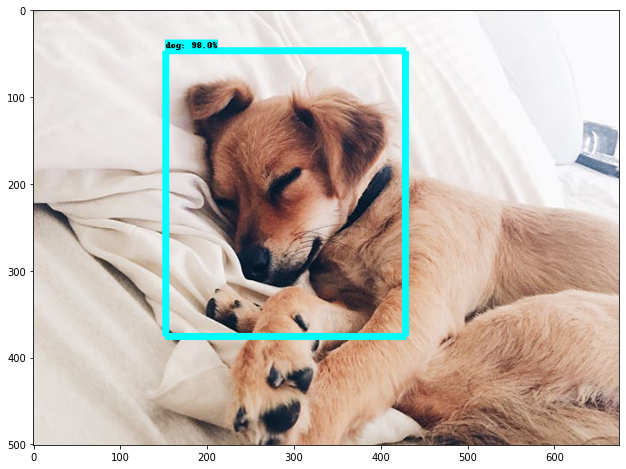

In [87]:
for image_path in TEST_IMAGE_PATHS:
  image = Image.open(image_path)
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = load_image_into_numpy_array(image)
  # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
  image_np_expanded = np.expand_dims(image_np, axis=0)
  # Actual detection.
  output_dict = run_inference_for_single_image(image_np_expanded, detection_graph)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks'),
      use_normalized_coordinates=True,
      line_thickness=8)
  plt.figure(figsize=IMAGE_SIZE)
  plt.imshow(image_np)
  plt.show()

Trying a video

In [88]:
import cv2
cap = cv2.VideoCapture('/content/gdrive/My Drive/object_detection/models/research/object_detection/images/test/catanddog.mp4')
try:
    with detection_graph.as_default():
        with tf.Session() as sess:
                # Get handles to input and output tensors
                ops = tf.get_default_graph().get_operations()
                all_tensor_names = {output.name for op in ops for output in op.outputs}
                tensor_dict = {}
                for key in [
                  'num_detections', 'detection_boxes', 'detection_scores',
                  'detection_classes', 'detection_masks'
                ]:
                    tensor_name = key + ':0'
                    if tensor_name in all_tensor_names:
                        tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
                      tensor_name)

                while True:
                    ret, image_np = cap.read()
                    # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
                    image_np_expanded = np.expand_dims(image_np, axis=0)
                    # Actual detection.
                    output_dict = run_inference_for_single_image(image_np, detection_graph)
                    # Visualization of the results of a detection.
                    vis_util.visualize_boxes_and_labels_on_image_array(
                        image_np,
                        output_dict['detection_boxes'],
                        output_dict['detection_classes'],
                        output_dict['detection_scores'],
                        category_index,
                        instance_masks=output_dict.get('detection_masks'),
                        use_normalized_coordinates=True,
                        line_thickness=8)
                    cv2.imshow('object_detection', cv2.resize(image_np, (800, 600)))
                    if cv2.waitKey(25) & 0xFF == ord('q'):
                        cap.release()
                        cv2.destroyAllWindows()
                        break
except Exception as e:
    print(e)
    cap.release()

Cannot feed value of shape (480, 608, 3) for Tensor 'image_tensor:0', which has shape '(?, ?, ?, 3)'
